In [138]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [139]:
df = pd.read_csv('./data_root/heart_attack_prediction_dataset.csv')

In [140]:
df

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1        0  ...   
1            1               1        1        1  ...   
2            1               0        0        0  ...   
3            1               1        1        0  ...   
4            1               1        1        1  ...   
...        ...             ...      ...      ...  ...   
8758         1               1        1        0  ...   
8759         1               0        0        1  ...   
8760         0               1        1        1  ...   
8761         1               0        1        0  ...   
8762         1               1        0        0  ...   

      Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                    6.615001  261404  31.251233            286   
1                    4.963459  285768  27.194973            235   
2                    9.463426  235282  28.176571            587   
3                    7.648981  125640  36.464704            378   
4                    1.514821  160555  21.809144            231   
...                       ...     ...        ...            ...   
8758                10.806373  235420  19.655895             67   
8759                 3.833038  217881  23.993866            617   
8760                 2.375214   36998  35.406146            527   
8761                 0.029104  209943  27.294020            114   
8762                 9.005234  247338  32.914151            180   

      Physical Activity Days Per Week  Sleep Hours Per Day         Country  \
0                                   0                    6       Argentina   
1                                   1                    7          Canada   
2                                   4                    4          France   
3                                   3                    4          Canada   
4                                   1                    5        Thailand   
...                               ...                  ...             ...   
8758                                7                    7        Thailand   
8759                                4                    9          Canada   
8760                                4                    4          Brazil   
8761                                2                    8          Brazil   
8762                                7                    4  United Kingdom   

          Continent           Hemisphere  Heart Attack Risk  
0     South America  Southern Hemisphere                  0  
1     North America  Northern Hemisphere                  0  
2            Europe  Northern Hemisphere                  0  
3     North America  Northern Hemisphere                  0  
4              Asia  Northern Hemisphere                  0  
...             ...                  ...                ...  
8758           Asia  Northern Hemisphere                  0  
8759  North America  Northern Hemisphere                  0  
8760  South America  Southern Hemisphere                  1  
8761  South America  Southern Hemisphere                  0  
8762         Europe  Northern H

In [141]:
df.rename(columns = {'BMI': 'IMC'}, inplace= True)

In [142]:
df.head()

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         IMC  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [144]:
df.describe()

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313                 5.783745   
min       0.000000     0.000000             0.000000                 0.002442   
25%       1.000000     0.000000             0.000000                 4.981579   
50%       1.000000     1.000000             1.000000                10.069559   
75%       1.000000     1.000000             1.000000                15.050018   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  Medication Use  Stress Level  \
count              8763.000000     8763.000000   8763.000000   
mean                  0.495835        0.498345      5.469702   
std                   0.500011        0.500026      2.859622   
min                   0.000000        0.000000      1.000000   
25%                   0.000000        0.000000      3.000000   
50%                   0.000000        0.000000      5.000000   
75%                   1.000000        1.000000      8.000000   
max                   1.000000        1.000000     10.000000   

       Sedentary Hours Per Day         Income          IMC  Triglycerides  \
count              8763.000000    8763.000000  8763.000000    8763.000000   
mean                  5.993690  158263.181901    28.891446     417.677051   
std                   3.466359   80575.190806     6.319181     223.748137   
min                   0.001263   20062.000000    18.002337      30.000000   
25%                   2.998794   88310.000000    23.422985     225.500000   
50%                   5.933622  157866.000000    28.768999     417.000000   
75%                   9.019124  227749.000000    34.324594     612.000000   
max                  11.999313  299954.000000    39.997211     800.000000   

       Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
count                      8763.000000          8763.000000        8763.000000  
mean                          3.489672             7.023508           0.358211  
std                           2.282687             1.988473           0.479502  
min                           0.000000             4.000000           0.000000  
25%                           2.000000             5.000000           0.000000  
50%                           3.000000             7.000000           0.000000  
75%                           5.000000             9.000000           1.000000  
max                           7.000000            10.000000           1.000000

In [145]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
IMC                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [146]:
df['is_Male'] = df['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
df = df.drop(columns=['Patient ID', 'Hemisphere', 'Sex', 'Physical Activity Days Per Week', 'Continent'])
df.head()

# Trocamos o Male para o valor 1 e Famale para o valor 0

Age  Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
0   67          208         158/88          72         0               0   
1   21          389         165/93          98         1               1   
2   21          324         174/99          72         1               0   
3   84          383        163/100          73         1               1   
4   66          318          91/88          93         1               1   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        1        0                    0                 4.168189  ...   
1        1        1                    1                 1.813242  ...   
2        0        0                    0                 2.078353  ...   
3        1        0                    1                 9.828130  ...   
4        1        1                    0                 5.804299  ...   

  Medication Use  Stress Level  Sedentary Hours Per Day  Income        IMC  \
0              0             9                 6.615001  261404  31.251233   
1              0             1                 4.963459  285768  27.194973   
2              1             9                 9.463426  235282  28.176571   
3              0             9                 7.648981  125640  36.464704   
4              0             6                 1.514821  160555  21.809144   

   Triglycerides  Sleep Hours Per Day    Country  Heart Attack Risk is_Male  
0            286                    6  Argentina                  0       1  
1            235                    7     Canada                  0       1  
2            587                    4     France                  0       0  
3            378                    4     Canada                  0       1  
4            231                    5   Thailand                  0       1  

[5 rows x 22 columns]

In [147]:
df_box1 = df[['Exercise Hours Per Week', 'Previous Heart Problems','Sedentary Hours Per Day','IMC']]
df_box2 = df[['Heart Rate','Cholesterol','Triglycerides', 'Age']]

# Criamos dois boxplot para identifcar outliers, um dos valores inteiros e um para os floats

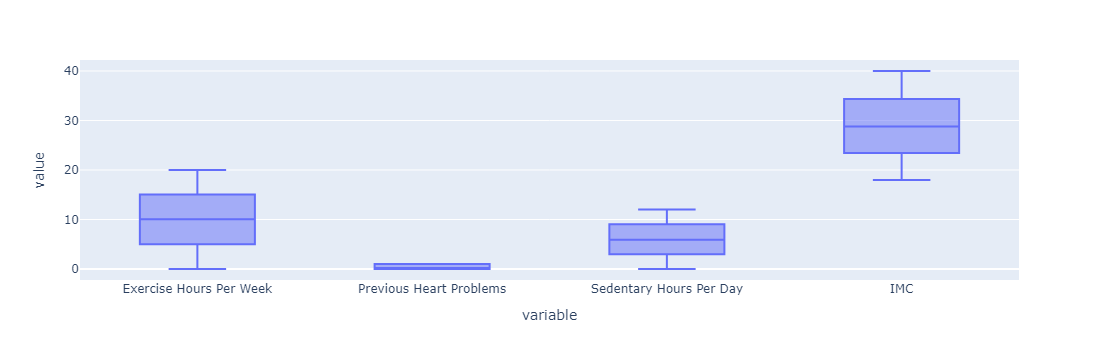

In [148]:
px.box(df_box1)

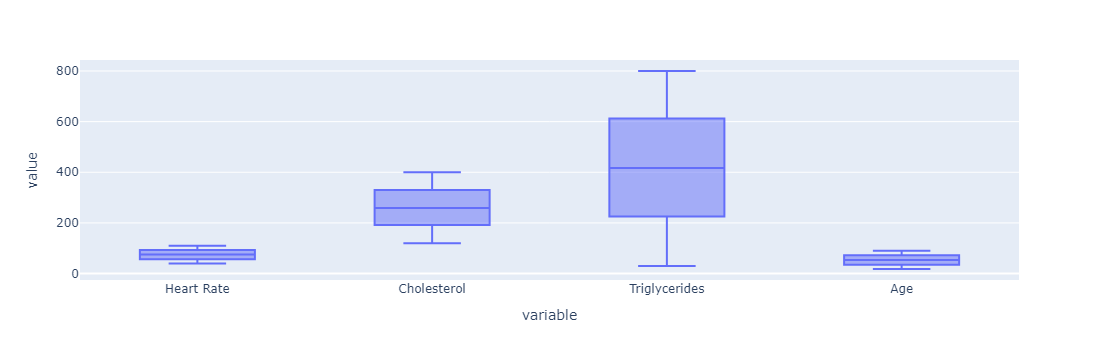

In [149]:
px.box(df_box2)

<Axes: >

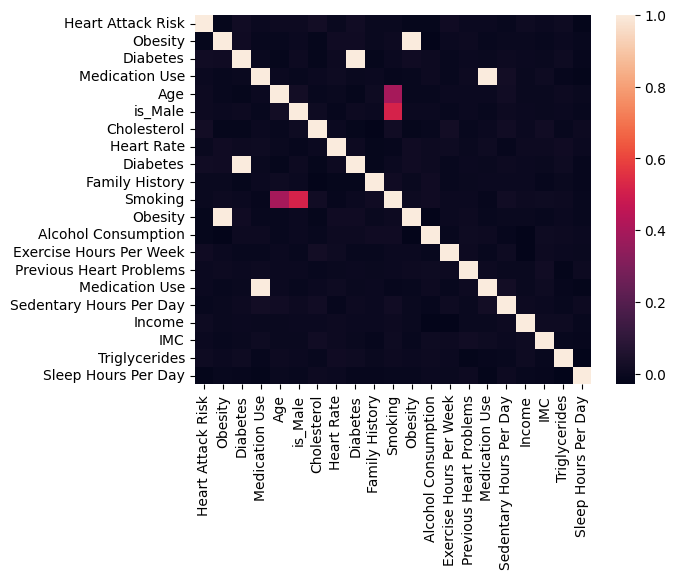

In [150]:
import seaborn as sns

sns.heatmap(df[['Heart Attack Risk','Obesity','Diabetes', 'Medication Use','Age', 
                'is_Male','Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week','Previous Heart Problems',
       'Medication Use', 'Sedentary Hours Per Day', 'Income',
       'IMC', 'Triglycerides',
       'Sleep Hours Per Day',]].corr())

#Heatmap para identicar melhor os dados e outliers

### Detecção de outliers 
Identificamos que nesse dataset não há outliers que estejam explícitos. Fizemos gráficos de boxplot para analisar a distribuiçao dos dados e nao havia outliers presentes. 

### Insights 
Colesterol tem dados maiores de 350, o que seria um colesterol muito alto do padrao. Cogitamos reduzir porëm podemos tirar reflexoes futuras sobre o risco de ataque cardíaco. 

Existem relaçao com Idade e pessoas fumantes e um relaçao baixa mas consideravel com genero e risco de ataque cardiaco, porem os dados considerados sao com vários publicos com números consideraveis para diferentes regioes e genero dificultando dizer ao certo.

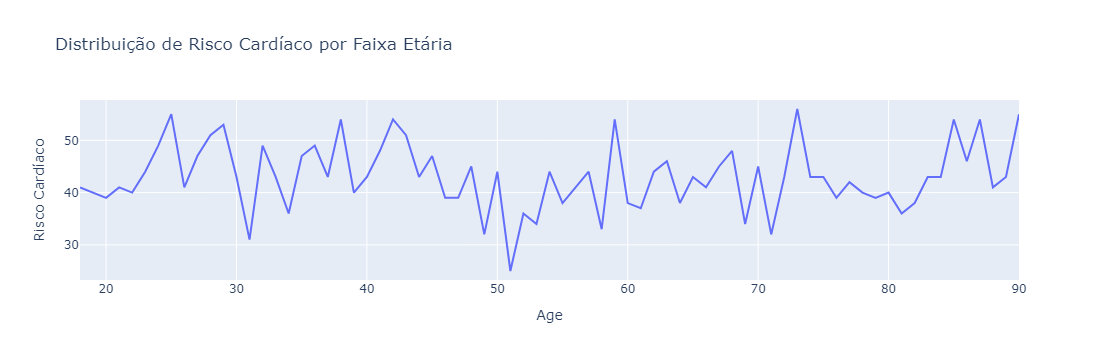

In [151]:
grouped_data = df.groupby('Age')['Heart Attack Risk'].sum().reset_index()

fig = px.line(
    grouped_data, 
    x='Age', 
    y='Heart Attack Risk', 
    labels={'Age Group': 'Faixa Etária', 'Heart Attack Risk': 'Risco Cardíaco'},
    title='Distribuição de Risco Cardíaco por Faixa Etária'
)

# Exibir o gráfico
fig.show()


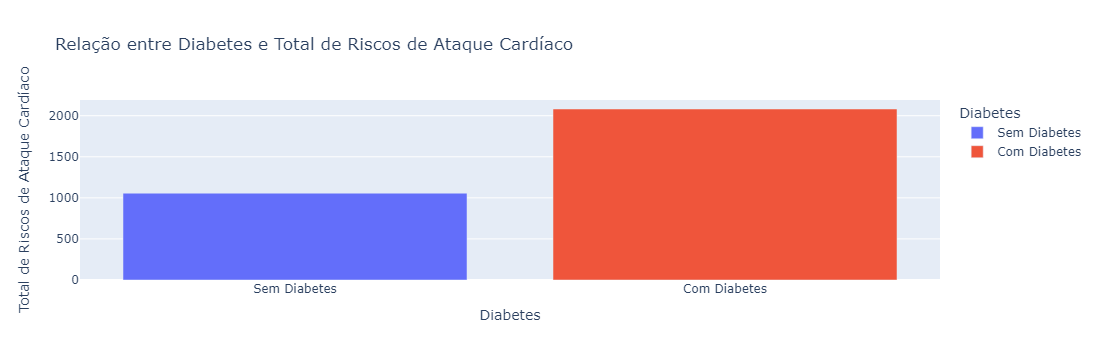

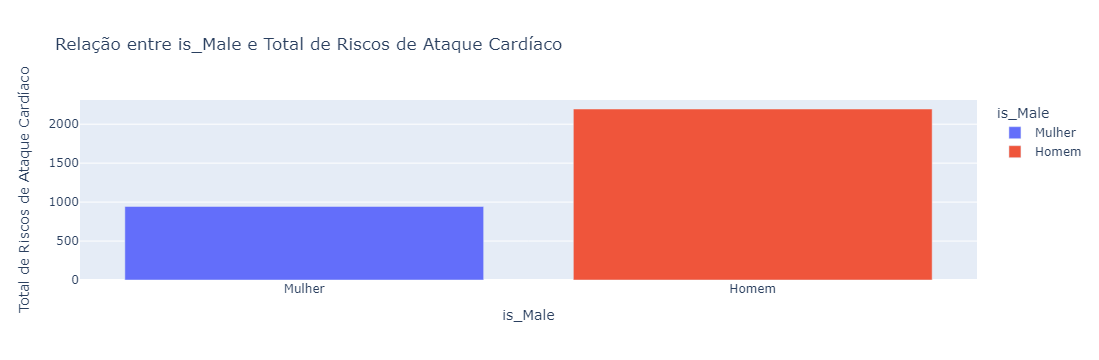

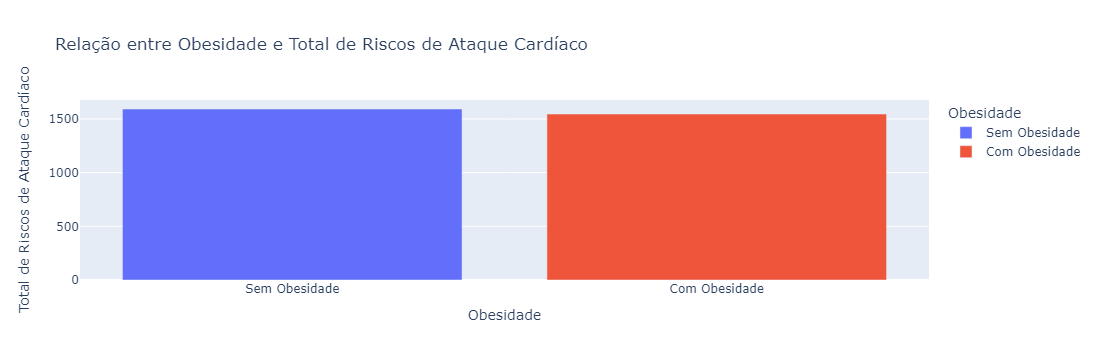

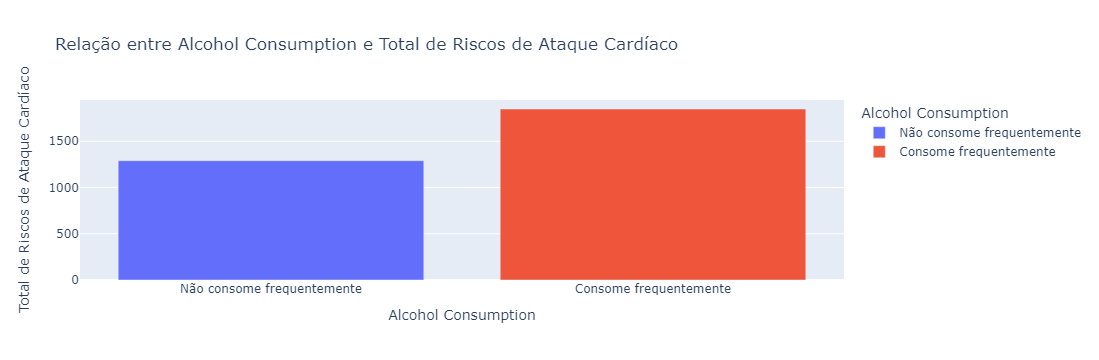

In [152]:
def plot_heart_risk_sum_by_condition(df, condition, condition_label, labels_dict):
    grouped = df.groupby(condition)['Heart Attack Risk'].sum().reset_index(name='Total Heart Attack Risk')
    
    grouped[condition] = grouped[condition].map(labels_dict)
    
    fig = px.bar(
        grouped,
        x=condition,
        color=condition,
        y='Total Heart Attack Risk',
        labels={
            condition: condition_label, 
            'Total Heart Attack Risk': 'Total de Riscos de Ataque Cardíaco'
        },
        title=f'Relação entre {condition_label} e Total de Riscos de Ataque Cardíaco'
    )
    fig.show()

# Dicionários de labels para 0 e 1 em cada condição
diabetes_labels = {0: 'Sem Diabetes', 1: 'Com Diabetes'}
obesity_labels = {0: 'Sem Obesidade', 1: 'Com Obesidade'}
medication_labels = {0: 'Sem Uso de Medicação', 1: 'Com Uso de Medicação'}
smoking_labels = {0: 'Não Fumante', 1: 'Fumante'}
familiar_labels = {0: 'Não tem historico', 1: 'Possui historico'}
gender_labels = {0: 'Mulher', 1: 'Homem'}
alcohol_labels = {0: 'Não consome frequentemente', 1: 'Consome frequentemente'}

# Gerando gráficos para cada condição com suas labels
plot_heart_risk_sum_by_condition(df, 'Diabetes', 'Diabetes', diabetes_labels)
plot_heart_risk_sum_by_condition(df, 'is_Male', 'is_Male', gender_labels)
plot_heart_risk_sum_by_condition(df, 'Obesity', 'Obesidade', obesity_labels)
plot_heart_risk_sum_by_condition(df, 'Alcohol Consumption', 'Alcohol Consumption', alcohol_labels)


In [153]:
plot_heart_risk_sum_by_condition(df, 'Medication Use', 'Uso de Medicação', medication_labels)
plot_heart_risk_sum_by_condition(df, 'Family History', 'Histórico familiar', familiar_labels)
plot_heart_risk_sum_by_condition(df, 'Smoking', 'Tabagismo', smoking_labels)

In [154]:
grouped_smoking = df.groupby('Age')['Smoking'].sum().reset_index()

fig = px.bar(grouped_smoking, 
             x='Age', 
             y='Smoking', 
             title='Número de Fumantes por Faixa Etária', 
             labels={'Age Group': 'Faixa Etária', 'Smoking': 'Número de Fumantes'})

fig.show()


### Podemos observar que:
Os gráficos revelam que as faixas etárias entre 25-30 anos e 60-70 anos apresentam maior risco de ataque cardíaco. Embora o risco aumente com a idade, especialmente após os 60 anos, pessoas mais jovens também estão expostas a esses riscos, principalmente devido a comportamentos como o tabagismo e o consumo excessivo de álcool. O tabagismo, em particular, se destaca como um fator de risco significativo, com a maioria das pessoas com risco de ataque cardíaco sendo fumantes. 

Além disso, a diabetes surge como uma das condições mais associadas ao risco de ataque cardíaco. A maioria das pessoas com risco cardiovascular também apresenta diabetes, o que indica que níveis elevados de glicose no sangue contribuem para a formação de placas nas artérias, favorecendo o desenvolvimento de aterosclerose. A diabetes também está ligada a problemas metabólicos, como o aumento de triglicerídeos, o que agrava ainda mais o risco de doenças cardíacas. Assim, o controle da glicemia é crucial para a prevenção de complicações cardiovasculares.

Embora a obesidade e o histórico familiar sejam fatores de risco conhecidos para doenças cardíacas, os dados deste estudo não mostram uma correlação tão forte com o risco de ataque cardíaco. Isso pode ser devido à forma como os dados foram coletados, possivelmente envolvendo uma amostra que não possuía informações completas sobre histórico familiar. Os homens, em particular, são os mais afetados por essas condições e frequentemente estão entre os que mais consomem álcool, o que também contribui para o risco cardiovascular. O alcoolismo, assim como o tabagismo, é um fator relevante, pois o consumo excessivo de álcool pode aumentar a pressão arterial e os níveis de triglicerídeos, que vamos ver aqui pra frente, além de prejudicar o músculo cardíaco.

In [155]:
bins = [0, 150, 200, 250, 300] 
labels = ['Low', 'Normal', 'High', 'Very High'] 

# Criar uma nova coluna com as faixas de colesterol
df['Cholesterol Group'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels, right=False)

# Agrupar pela faixa de colesterol e somar o risco de ataque cardíaco
cholesterol_risk = df.groupby('Cholesterol Group')['Heart Attack Risk'].sum().reset_index()

fig = px.bar(cholesterol_risk, x='Cholesterol Group', y='Heart Attack Risk',
             labels={'Cholesterol Group': 'Faixa de Colesterol', 'Heart Attack Risk': 'Soma do Risco Cardíaco'},
             title='Relação entre Colesterol e Risco Cardíaco')

fig.show()

C:\Users\garin\AppData\Local\Temp\ipykernel_37276\2893271593.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [156]:
# Separando a coluna 'Blood Pressure' em 'Systolic' e 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

# Agrupando por colesterol e somando o risco de ataque cardíaco
cholesterol_risk = df.groupby('Cholesterol').agg({
    'Systolic': 'mean', 
    'Diastolic': 'mean',  
    'Heart Attack Risk': 'sum' 
}).reset_index()

# Gráfico de dispersão para Cholesterol vs Systolic Pressure
fig1 = px.scatter(cholesterol_risk, x='Heart Attack Risk', y='Systolic',
                   color='Cholesterol', 
                  labels={'Cholesterol': 'Nivel de Colesterol', 'Systolic': 'Pressão arterial sistólica', 'Heart Attack Risk': 'Risco de ataque cardíaco'},
                  title='Colesterol vs Pressão arterial sistólica')

# Gráfico de dispersão para Cholesterol vs Diastolic Pressure
fig2 = px.scatter(cholesterol_risk, x='Heart Attack Risk', y='Diastolic',
                    color='Cholesterol', 
                  labels={'Cholesterol': 'Nivel de Colesterol', 'Diastolic': 'Pressão Arterial Diastólica', 'Heart Attack Risk': 'Risco de ataque cardíaco'},
                  title='Colesterol vs Pressão Arterial Diastólica')

fig1.show()
fig2.show()

In [157]:
bins = [0, 60, 70, 80, 150]  
labels = ['Low', 'Normal', 'High', 'Very High'] 

# Criar uma nova coluna para a faixa de frequência cardíaca
df['Heart Rate Group'] = pd.cut(df['Heart Rate'], bins=bins, labels=labels, right=False)

# Agrupar pela faixa de frequência cardíaca e somar o risco de ataque cardíaco
heart_rate_risk = df.groupby('Heart Rate Group')['Heart Attack Risk'].sum().reset_index()
fig = px.bar(heart_rate_risk, 
             x='Heart Rate Group', 
             y='Heart Attack Risk',
             labels={'Heart Rate Group': 'Heart Rate Group', 'Heart Attack Risk': 'Risco de ataque cardiaco'},
             title='Relação entre Batimento cardiaco e Risco de ataque cardiaco')

fig.show()

C:\Users\garin\AppData\Local\Temp\ipykernel_37276\3166570976.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [158]:
bins = [0, 100, 300, 500, 800]  
labels = ['Low', 'Normal', 'High', 'Very High'] 

# Criar uma nova coluna para a faixa de frequência cardíaca
df['Triglycerides Group'] = pd.cut(df['Triglycerides'], bins=bins, labels=labels, right=False)

# Agrupar pela faixa de frequência cardíaca e somar o risco de ataque cardíaco
heart_rate_risk = df.groupby('Triglycerides Group')['Heart Attack Risk'].sum().reset_index()
fig = px.bar(heart_rate_risk, 
             x='Triglycerides Group', 
             y='Heart Attack Risk',
             labels={'Triglycerides Group': 'Triglycerides Group', 'Heart Attack Risk': 'RIsco de ataque de cardiaco'},
             title='Relação entre gordura Triglycerides e risco de ataque cardiaco')

fig.show()

C:\Users\garin\AppData\Local\Temp\ipykernel_37276\2976577507.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [159]:
fig1 = px.histogram(df, x='Exercise Hours Per Week', color='Heart Attack Risk',
                    barmode='group',  # Grupos lado a lado
                    labels={'Exercise Hours Per Week': 'Horas de Exercício por Semana', 
                            'Heart Attack Risk': 'Risco de Ataque Cardíaco'},
                    title='Horas de Exercício por Semana vs Risco de Ataque Cardíaco',
                   )
fig2 = px.histogram(df, x='Sedentary Hours Per Day', color='Heart Attack Risk',
                    barmode='group',  # Grupos lado a lado
                    labels={'Sedentary Hours Per Day': 'Horas de Sedentarismo por Dia', 
                            'Heart Attack Risk': 'Risco de Ataque Cardíaco'},
                    title='Horas de Sedentarismo por Dia vs Risco de Ataque Cardíaco',
                   )
fig1.show()
fig2.show()

### Podemos ver que:
Podemos ver que o nivel de colesterol geralmente tem a ver com risco de ataque cardiaco. E a pressão sanguineo com corelação com o colesterol devido ao impacto que ambas têm na saúde dos vasos sanguíneos. A hipertensão pode causar danos às paredes das artérias, desencadeando uma resposta inflamatória que estimula o acúmulo de "colesterol ruim", nas áreas lesionadas, levando à formação de placas. Além disso, fatores comuns como resistência à insulina, obesidade e dieta pouco saudável podem elevar simultaneamente a pressão arterial e o colesterol, agravando o risco de doenças cardiovasculares. Assim, o desequilíbrio de um pode influenciar diretamente o outro.

Outros maus hábitos como podemos ver nos gráficos diminuem a chance de você ter ataque cardíaco como você nao ter tanto exercicios por semana ou muitas horas sedentárias principalmente. Mas não tem tanta relação, podemos observar apenas que geralmente o risco não aparece muito ou seja pode ser uma forma de prever.

Nos gráfico podemos analisar que o maior risco de ataque cardiaco está relacionado ao cardíacos muito baixos (bradicardia) ou muito altos (taquicardia) porque ambos indicam que o coração pode estar funcionando de forma ineficiente, comprometendo o fluxo sanguíneo adequado para o corpo e os próprios tecidos do coração. Outro fator são os níveis elevados de triglicerídeos que podemos ver no gráfico está fortemente associados a um maior risco de doenças cardíacas, incluindo ataques cardíacos. Quando os níveis de triglicerídeos são altos, pode ocorrer o acúmulo de gordura nas artérias, formando placas chamadas aterosclerose. Essas placas podem estreitar e obstruir as artérias, dificultando o fluxo sanguíneo e aumentando o risco de um bloqueio, que pode levar a um ataque cardíaco. Outro fator importante é que níveis elevados de triglicerídeos podem afetar os níveis de colesterol no sangue. O aumento de triglicerídeos pode reduzir o colesterol "bom" e aumentar o colesterol "ruim".

In [160]:
grouped_data = df.groupby('Country')['Heart Attack Risk'].sum().reset_index()

fig = px.scatter_geo(grouped_data, 
                     locations="Country",
                     color="Heart Attack Risk", 
                     size="Heart Attack Risk", 
                     hover_name="Country",
                     hover_data=["Heart Attack Risk"], 
                     title="Risco de Ataque Cardíaco por País",
                     color_continuous_scale="Viridis", 
                     projection="natural earth", 
                    locationmode="country names"
                    )

fig.show()

In [161]:
bins = [0, 25000, 50000, 200000, 300000]  
labels = ['Low', 'Normal', 'High', 'Very High'] 

# Criar uma nova coluna para a faixa de frequência cardíaca
df['Income Group'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

# Agrupar pela faixa de frequência cardíaca e somar o risco de ataque cardíaco
heart_rate_risk = df.groupby('Income Group')['Heart Attack Risk'].sum().reset_index()
fig = px.bar(heart_rate_risk, 
             x='Income Group', 
             y='Heart Attack Risk',
             labels={'Income Group': 'Nivel salário', 'Heart Attack Risk': 'Sum of Heart Attack Risk'},
             title='Relação entre salário e risco de ataque cardíaco')

fig.show()

C:\Users\garin\AppData\Local\Temp\ipykernel_37276\1117710102.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Podemos ver que:
Os países mais afetados como 178 para a **Nigéria** e 174 para a **Argentina**. Isso sugere que em algumas regiões da África e da América Latina, fatores como falta de acesso a cuidados de saúde, hábitos alimentares inadequados e alta prevalência de condições como diabetes e hipertensão podem estar contribuindo significativamente para o aumento do risco de doenças cardíacas. Em países em desenvolvimento, as questões socioeconômicas também podem afetar a saúde cardiovascular, uma vez que há menos conscientização sobre a prevenção e menos acesso a tratamentos adequados

Por outro lado, países mais desenvolvidos como **Estados Unidos**, **Austrália**, **Reino Unido**, e **França** também apresentam números elevados, com valores como 166 para os Estados Unidos e 160 para o Reino Unido. O alto risco de ataque cardíaco nesses países pode estar relacionado a fatores como dietas ricas em gorduras saturadas, sedentarismo e consumo elevado de álcool. Em muitos desses países, apesar de um bom acesso a cuidados médicos, os estilos de vida modernos, caracterizados por longas horas de trabalho, alta ingestão de alimentos processados e baixo nível de atividade física, aumentam o risco cardiovascular. Além disso, condições como obesidade e diabetes são prevalentes, o que contribui diretamente para o aumento do risco de doenças do coração.

Países como **Brasil**, **Colômbia** e **Tailândia**, Nesses lugares, fatores como dieta desequilibrada, uso de substâncias como tabaco e álcool, além de sistemas de saúde nem sempre acessíveis, podem ser determinantes. Além disso, em muitos desses países, o envelhecimento da população, bem como o aumento de doenças como diabetes, hipertensão e colesterol alto, estão se tornando questões crescentes, colocando essas regiões em risco maior de complicações cardiovasculares. A falta de campanhas eficazes de conscientização sobre a saúde cardiovascular também pode ser um dos fatores que contribuem para esses números elevados



Outra coisa que analisamos foi o salário, que parece não ter muita relação pois afeta a classe mais alta e o uso do medicamento parece não ter afeito no risco do ataque cardíaco ou não foi documentado na base de dados após o uso ou o tempo de consumo.

In [162]:
#  remove Blood pressure pois foi separado em 2 valores diferentes Systolic e Diastolic
df.drop(['Blood Pressure'], axis=1, inplace=True)

In [163]:
#  remove colunas que foram criada para serem usadas nos gráficos
df.drop(['Cholesterol Group', 'Heart Rate Group', 'Triglycerides Group', 'Income Group'], axis=1, inplace=True)

In [164]:
df

Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0      67          208          72         0               0        1   
1      21          389          98         1               1        1   
2      21          324          72         1               0        0   
3      84          383          73         1               1        1   
4      66          318          93         1               1        1   
...   ...          ...         ...       ...             ...      ...   
8758   60          121          61         1               1        1   
8759   28          120          73         1               0        0   
8760   47          250         105         0               1        1   
8761   36          178          60         1               0        1   
8762   25          356          75         1               1        0   

      Obesity  Alcohol Consumption  Exercise Hours Per Week       Diet  ...  \
0           0                    0                 4.168189    Average  ...   
1           1                    1                 1.813242  Unhealthy  ...   
2           0                    0                 2.078353    Healthy  ...   
3           0                    1                 9.828130    Average  ...   
4           1                    0                 5.804299  Unhealthy  ...   
...       ...                  ...                      ...        ...  ...   
8758        0                    1                 7.917342    Healthy  ...   
8759        1                    0                16.558426    Healthy  ...   
8760        1                    1                 3.148438    Average  ...   
8761        0                    0                 3.789950  Unhealthy  ...   
8762        0                    1                18.081748    Healthy  ...   

      Sedentary Hours Per Day  Income        IMC  Triglycerides  \
0                    6.615001  261404  31.251233            286   
1                    4.963459  285768  27.194973            235   
2                    9.463426  235282  28.176571            587   
3                    7.648981  125640  36.464704            378   
4                    1.514821  160555  21.809144            231   
...                       ...     ...        ...            ...   
8758                10.806373  235420  19.655895             67   
8759                 3.833038  217881  23.993866            617   
8760                 2.375214   36998  35.406146            527   
8761                 0.029104  209943  27.294020            114   
8762                 9.005234  247338  32.914151            180   

      Sleep Hours Per Day         Country  Heart Attack Risk  is_Male  \
0                       6       Argentina                  0        1   
1                       7          Canada                  0        1   
2                       4          France                  0        0   
3                       4          Canada                  0        1   
4                       5        Thailand                  0        1   
...                   ...             ...                ...      ...   
8758                    7        Thailand                  0        1   
8759                    9          Canada                  0        0   
8760                    4          Brazil                  1        1   
8761                    8          Brazil                  0        1   
8762                    4  United Kingdom                  1        0   

     Systolic  Diastolic  
0         158         88  
1         165         93  
2         174         99  
3         163        100  
4          91         88  
...       ...        ...  
8758       94         76  
8759      157        102  
8760      161         75  
8761      119         67  
8762      138         67  

[8763 rows x 23 columns]

In [165]:
scaler = MinMaxScaler()
columns_to_normalize= ['Age', 'Cholesterol', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', "Income", "IMC", "Triglycerides", "Sleep Hours Per Day", "Systolic", "Diastolic"]
# Aplicando a normalização nas colunas numericas com frequencia
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df.head()

Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0  0.680556     0.314286          72         0               0        1   
1  0.041667     0.960714          98         1               1        1   
2  0.041667     0.728571          72         1               0        0   
3  0.916667     0.939286          73         1               1        1   
4  0.666667     0.707143          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week       Diet  ...  \
0        0                    0                 0.208326    Average  ...   
1        1                    1                 0.090557  Unhealthy  ...   
2        0                    0                 0.103815    Healthy  ...   
3        0                    1                 0.491376    Average  ...   
4        1                    0                 0.290147  Unhealthy  ...   

   Sedentary Hours Per Day    Income       IMC  Triglycerides  \
0                 0.551234  0.862268  0.602363       0.332468   
1                 0.413584  0.949316  0.417945       0.266234   
2                 0.788642  0.768939  0.462573       0.723377   
3                 0.637413  0.377210  0.839394       0.451948   
4                 0.126150  0.501954  0.173077       0.261039   

   Sleep Hours Per Day    Country  Heart Attack Risk  is_Male  Systolic  \
0             0.333333  Argentina                  0        1  0.755556   
1             0.500000     Canada                  0        1  0.833333   
2             0.000000     France                  0        0  0.933333   
3             0.000000     Canada                  0        1  0.811111   
4             0.166667   Thailand                  0        1  0.011111   

   Diastolic  
0       0.56  
1       0.66  
2       0.78  
3       0.80  
4       0.56  

[5 rows x 23 columns]

## Insights
Normalizar os dados para modelos como KNN ou outros é uma boa prática mas para Random forest que seria o mais ideal para esse dataset não precisa. Entretanto, mesmo assim todas as colunas númericas agora tem a mesma frequência para melhor uso em futuras analises. Iremos verificar nos proximos passos se a acuracia muda.

In [166]:
df['Diet'].unique()

# Verificando o tipo tipo dos dados e o nome deles

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['Diet'] = label_encoder.fit_transform(df['Diet'])
(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Transformando eles em númericos utilizando Label Encoder
# Printando os antigos nomes com os novos números, mas estará comentado abaixo para uma melhor visualização

# Average: 0, Healthy: 1, Unhealthy: 2 

{'Average': np.int64(0), 'Healthy': np.int64(1), 'Unhealthy': np.int64(2)}

In [169]:
df.head()

Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0  0.680556     0.314286          72         0               0        1   
1  0.041667     0.960714          98         1               1        1   
2  0.041667     0.728571          72         1               0        0   
3  0.916667     0.939286          73         1               1        1   
4  0.666667     0.707143          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0        0                    0                 0.208326     0  ...   
1        1                    1                 0.090557     2  ...   
2        0                    0                 0.103815     1  ...   
3        0                    1                 0.491376     0  ...   
4        1                    0                 0.290147     2  ...   

   Sedentary Hours Per Day    Income       IMC  Triglycerides  \
0                 0.551234  0.862268  0.602363       0.332468   
1                 0.413584  0.949316  0.417945       0.266234   
2                 0.788642  0.768939  0.462573       0.723377   
3                 0.637413  0.377210  0.839394       0.451948   
4                 0.126150  0.501954  0.173077       0.261039   

   Sleep Hours Per Day    Country  Heart Attack Risk  is_Male  Systolic  \
0             0.333333  Argentina                  0        1  0.755556   
1             0.500000     Canada                  0        1  0.833333   
2             0.000000     France                  0        0  0.933333   
3             0.000000     Canada                  0        1  0.811111   
4             0.166667   Thailand                  0        1  0.011111   

   Diastolic  
0       0.56  
1       0.66  
2       0.78  
3       0.80  
4       0.56  

[5 rows x 23 columns]